---
<h1 align="center"><strong>Añade tus Datos Privados a los LLM Mediante LangChain y LlamaIndex</strong></h1>

---

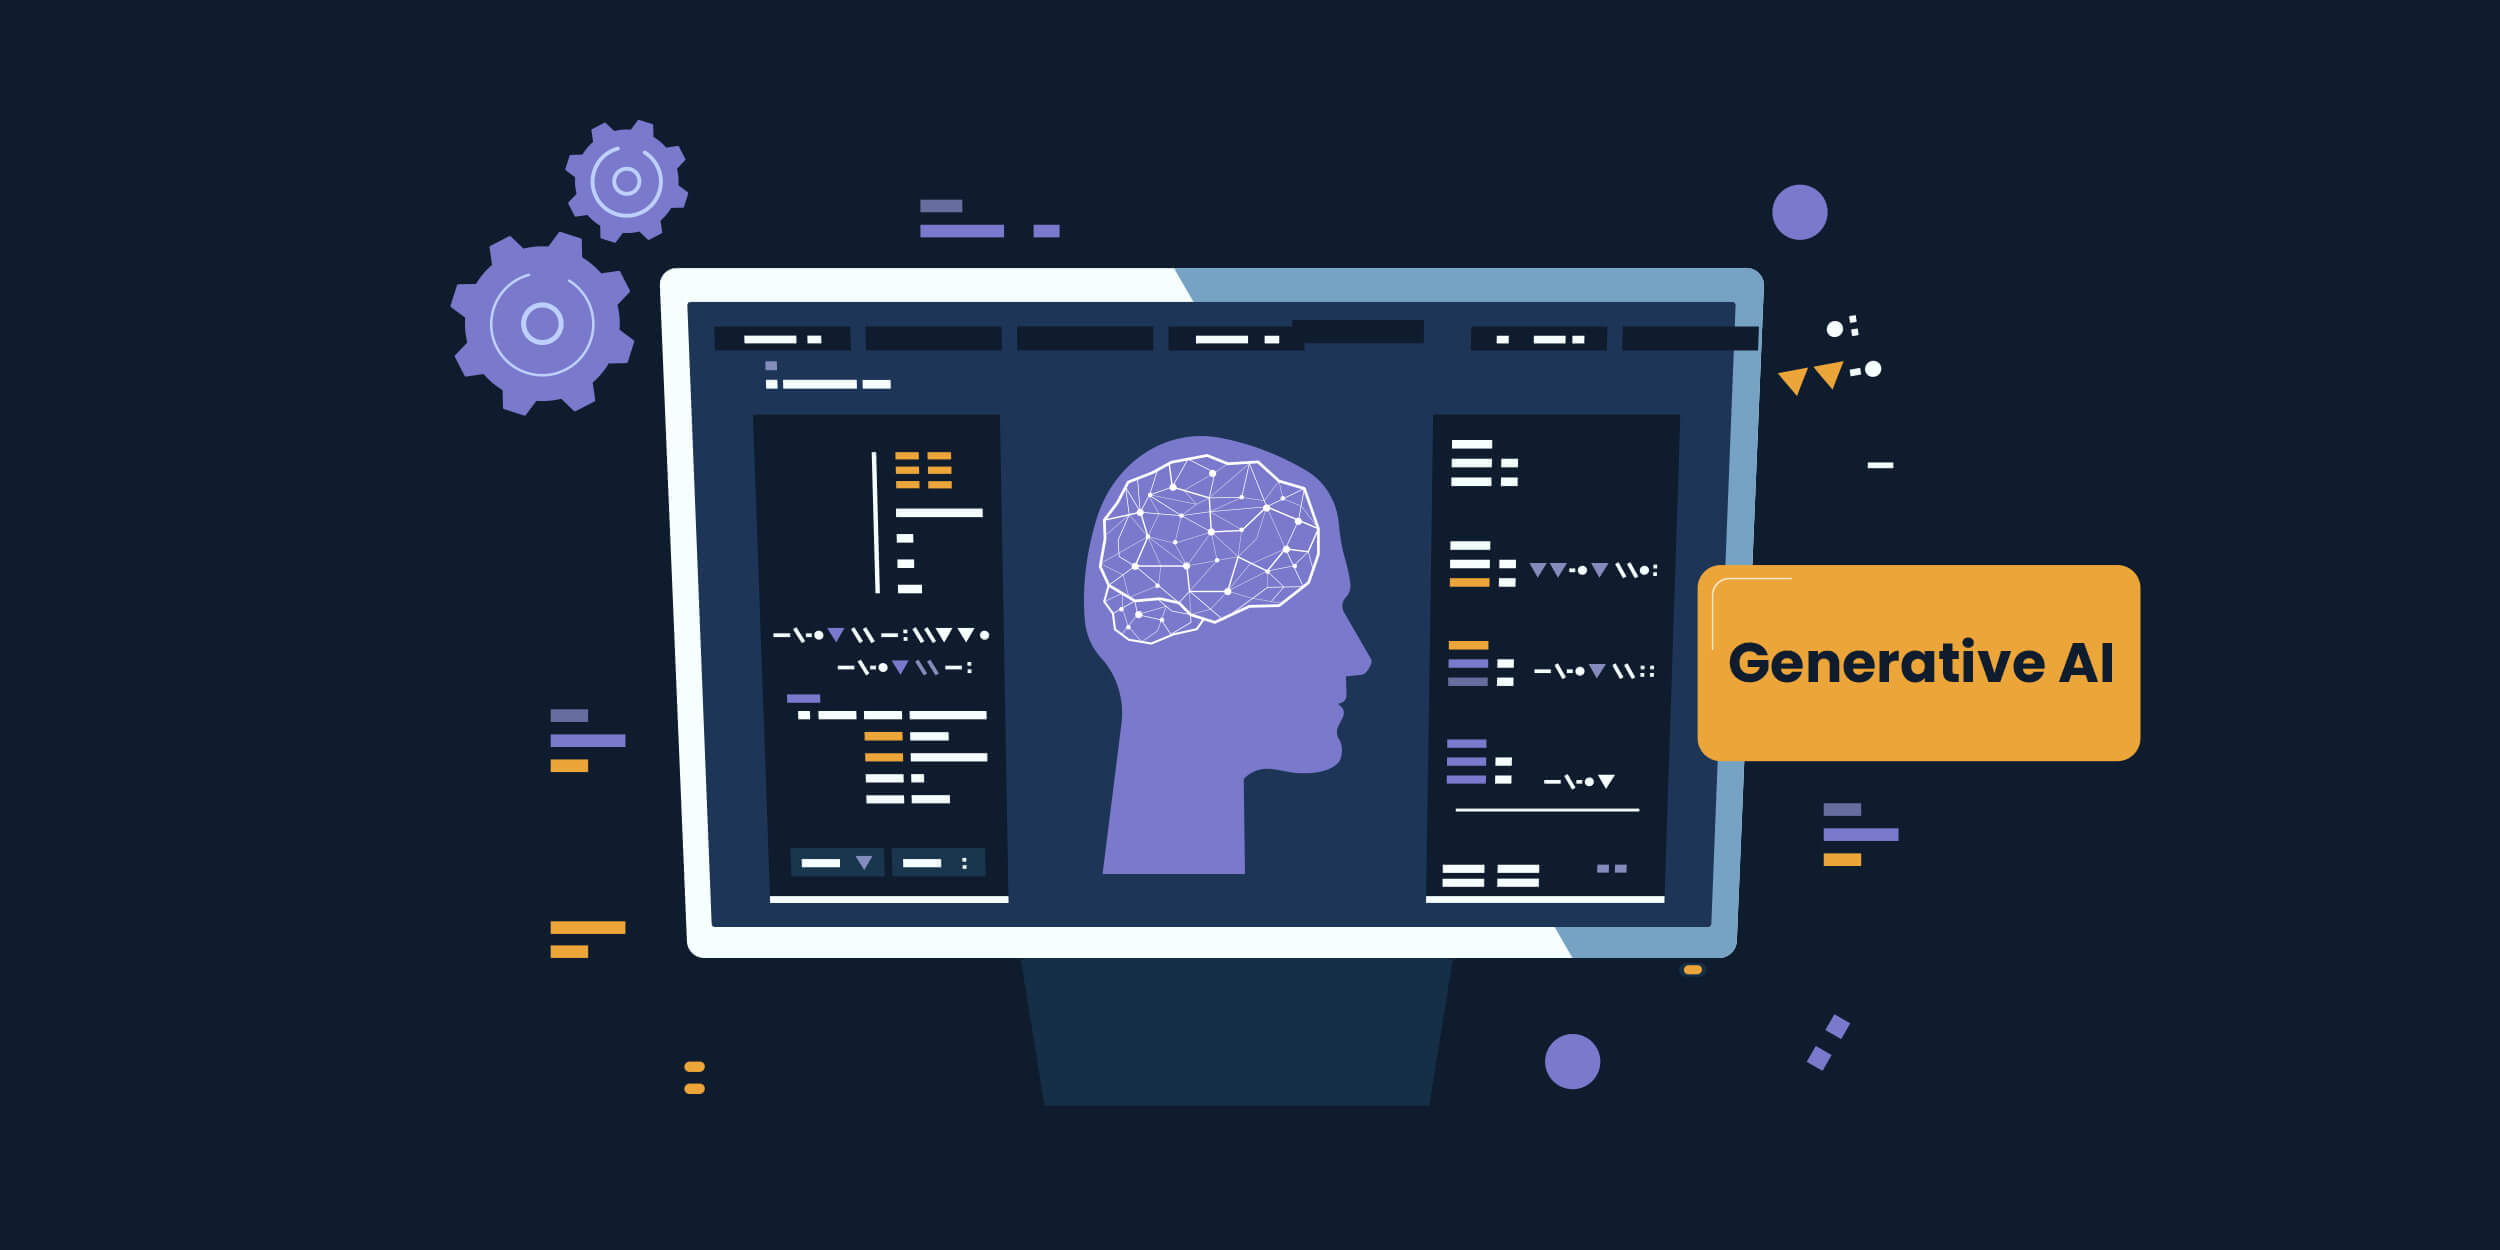

#### **Keywords**: **`GenAI`**, **`LLMs`**, **`RAG`**, **`ChatGPT`**

### **Introducción**

Actualmente, la **IA generativa** está impresionando al mundo entero con su capacidad para crear imágenes, códigos y diálogos realistas. Sin duda, **[ChatGPT](https://chat.openai.com/)** esto ha supuesto un gran avance. Millones de personas lo utilizan. Sin embargo, aunque es muy potente en lo que respecta al conocimiento general, sólo conoce la información con la que fue entrenada, es decir, los datos que encontramos disponibles en Internet hasta 2021. Así pues, no conoce tus datos privados ni las fuentes de datos más recientes.

En el mismo contexto, los Large Language Models (**LLMs**) son excelentes para muchas cosas (si no estás familiarizado con los LLM, no te preocupes, puedes ver este increíble **[vídeo](https://www.youtube.com/watch?v=hfIUstzHs9A)** de **Kate Soule** de **IBM**). No obstante, como decíamos antes, no están especialmente entrenados para recuperar información actual o privada. Por lo tanto, para mejorarlos en ese aspecto, primero debemos  proporcionarles información recuperada mediante la búsqueda de documentos similares (similarity search). Esto los hace más conscientes y les da una mayor capacidad para proporcionar al modelo información actualizada, sin necesidad de volver a entrenar a estos modelos masivos. Esto es precisamente lo que es un LLM mejorado por recuperación. De hecho, este post esbozará con precisión la creación de un modelo de este tipo y dilucidará los pasos a seguir en cuanto a su optimización.

Por lo tanto, el presente post trata el tema de como **Añadir Datos Privados a los LLMs**, y de como crear un sistema de Retrieval-Augmented Generation (**RAG**) que utiliza el conocimiento de ChatGPT sobre un corpus de datos específico, actual o privado mediante herramientas de ingeniería de pronóstico como LangChain y LlamaIndex. De hecho, no te pierdas nada; tenemos una **BONIFICACIÓN** muy chula para ti al final.

---


##### **¿Qué es LlamaIndex?**
> LlamaIndex simplifica las aplicaciones basadas en LLMs. Los LLMs, como [**GPT-4**](https://arxiv.org/abs/2303.08774), [**Falcon 🦅**](https://falconllm.tii.ae/) y [**LLaMa2 🦙**](https://arxiv.org/abs/2307.09288), llegan preentrenados en vastos conjuntos de datos públicos, lo que desbloquea las impresionantes capacidades de procesamiento del lenguaje natural. Sin embargo, como es obvio, carecen de datos privados específicos.

> Con LlamaIndex sin embargo, podemos incorporar sin problemas datos de **API**, **bases de datos**, **archivos PDF** y **mucho más** mediante conectores adaptables. Estos datos se optimizan para los LLMs mediante representaciones intermedias. Esto permite realizar, sin efuero, consultas e interacciones en lenguaje natural a través de motores de consulta, interfaces de chat y agentes de datos potenciados por los LLM. Así, el LLM puede acceder a una gran cantidad de datos privados y comprenderlos sin necesidad de reentrenar el modelo para obtener nueva información.

> LlamaIndex ofrece un completo conjunto de herramientas para aplicaciones basadas en lenguaje. Además, se pueden aprovechar los cargadores de datos y las herramientas de agente de [**Llama Hub**](https://llamahub.ai/) los cuales permiten crear aplicaciones complejas con diversas funcionalidades.

##### **¿Qué es LangChain?**
> LangChain es un marco para desarrollar aplicaciones basadas en modelos lingüísticos. Permite aplicaciones que son:

* **Conscientes sobre los datos:** conectan un modelo lingüístico a otras fuentes de datos.
* **Agentic**: permiten a un modelo lingüístico interactuar con su entorno.

Estas son algunas de las principales ventajas de LangChain:
1. **Componentes**: Herramientas abstractas para trabajar con modelos lingüísticos, junto con una colección de implementaciones para cada herramienta. Estos componentes modulares son fáciles de usar y pueden emplearse independientemente del marco LangChain.
2. ***Off-the-shelf chains***: Un conjunto estructurado de componentes para realizar tareas específicas de nivel superior

> La disponibilidad de ***chains*** prediseñadas facilita la iniciación. Para aplicaciones complejas y escenarios matizados, los componentes permiten personalizar sin esfuerzo las ***chains*** existentes o crear otras nuevas.

En este tutorial, utilizaremos LangChain únicamente para inicializar nuestros modelos LLM y embedder procedentes de Azure OpenAI.

### **¿Cómo funciona RAG?**

**RAG** consiste en integrar la potencia de la recuperación (o búsqueda) en un **LLM base**. En general, consta de un **recuperador**, que obtiene fragmentos de documentos relevantes de un gran corpus de información externa, y un **LLM**, que produce respuestas a partir de esos fragmentos, como se ilustra en el siguiente diagrama:

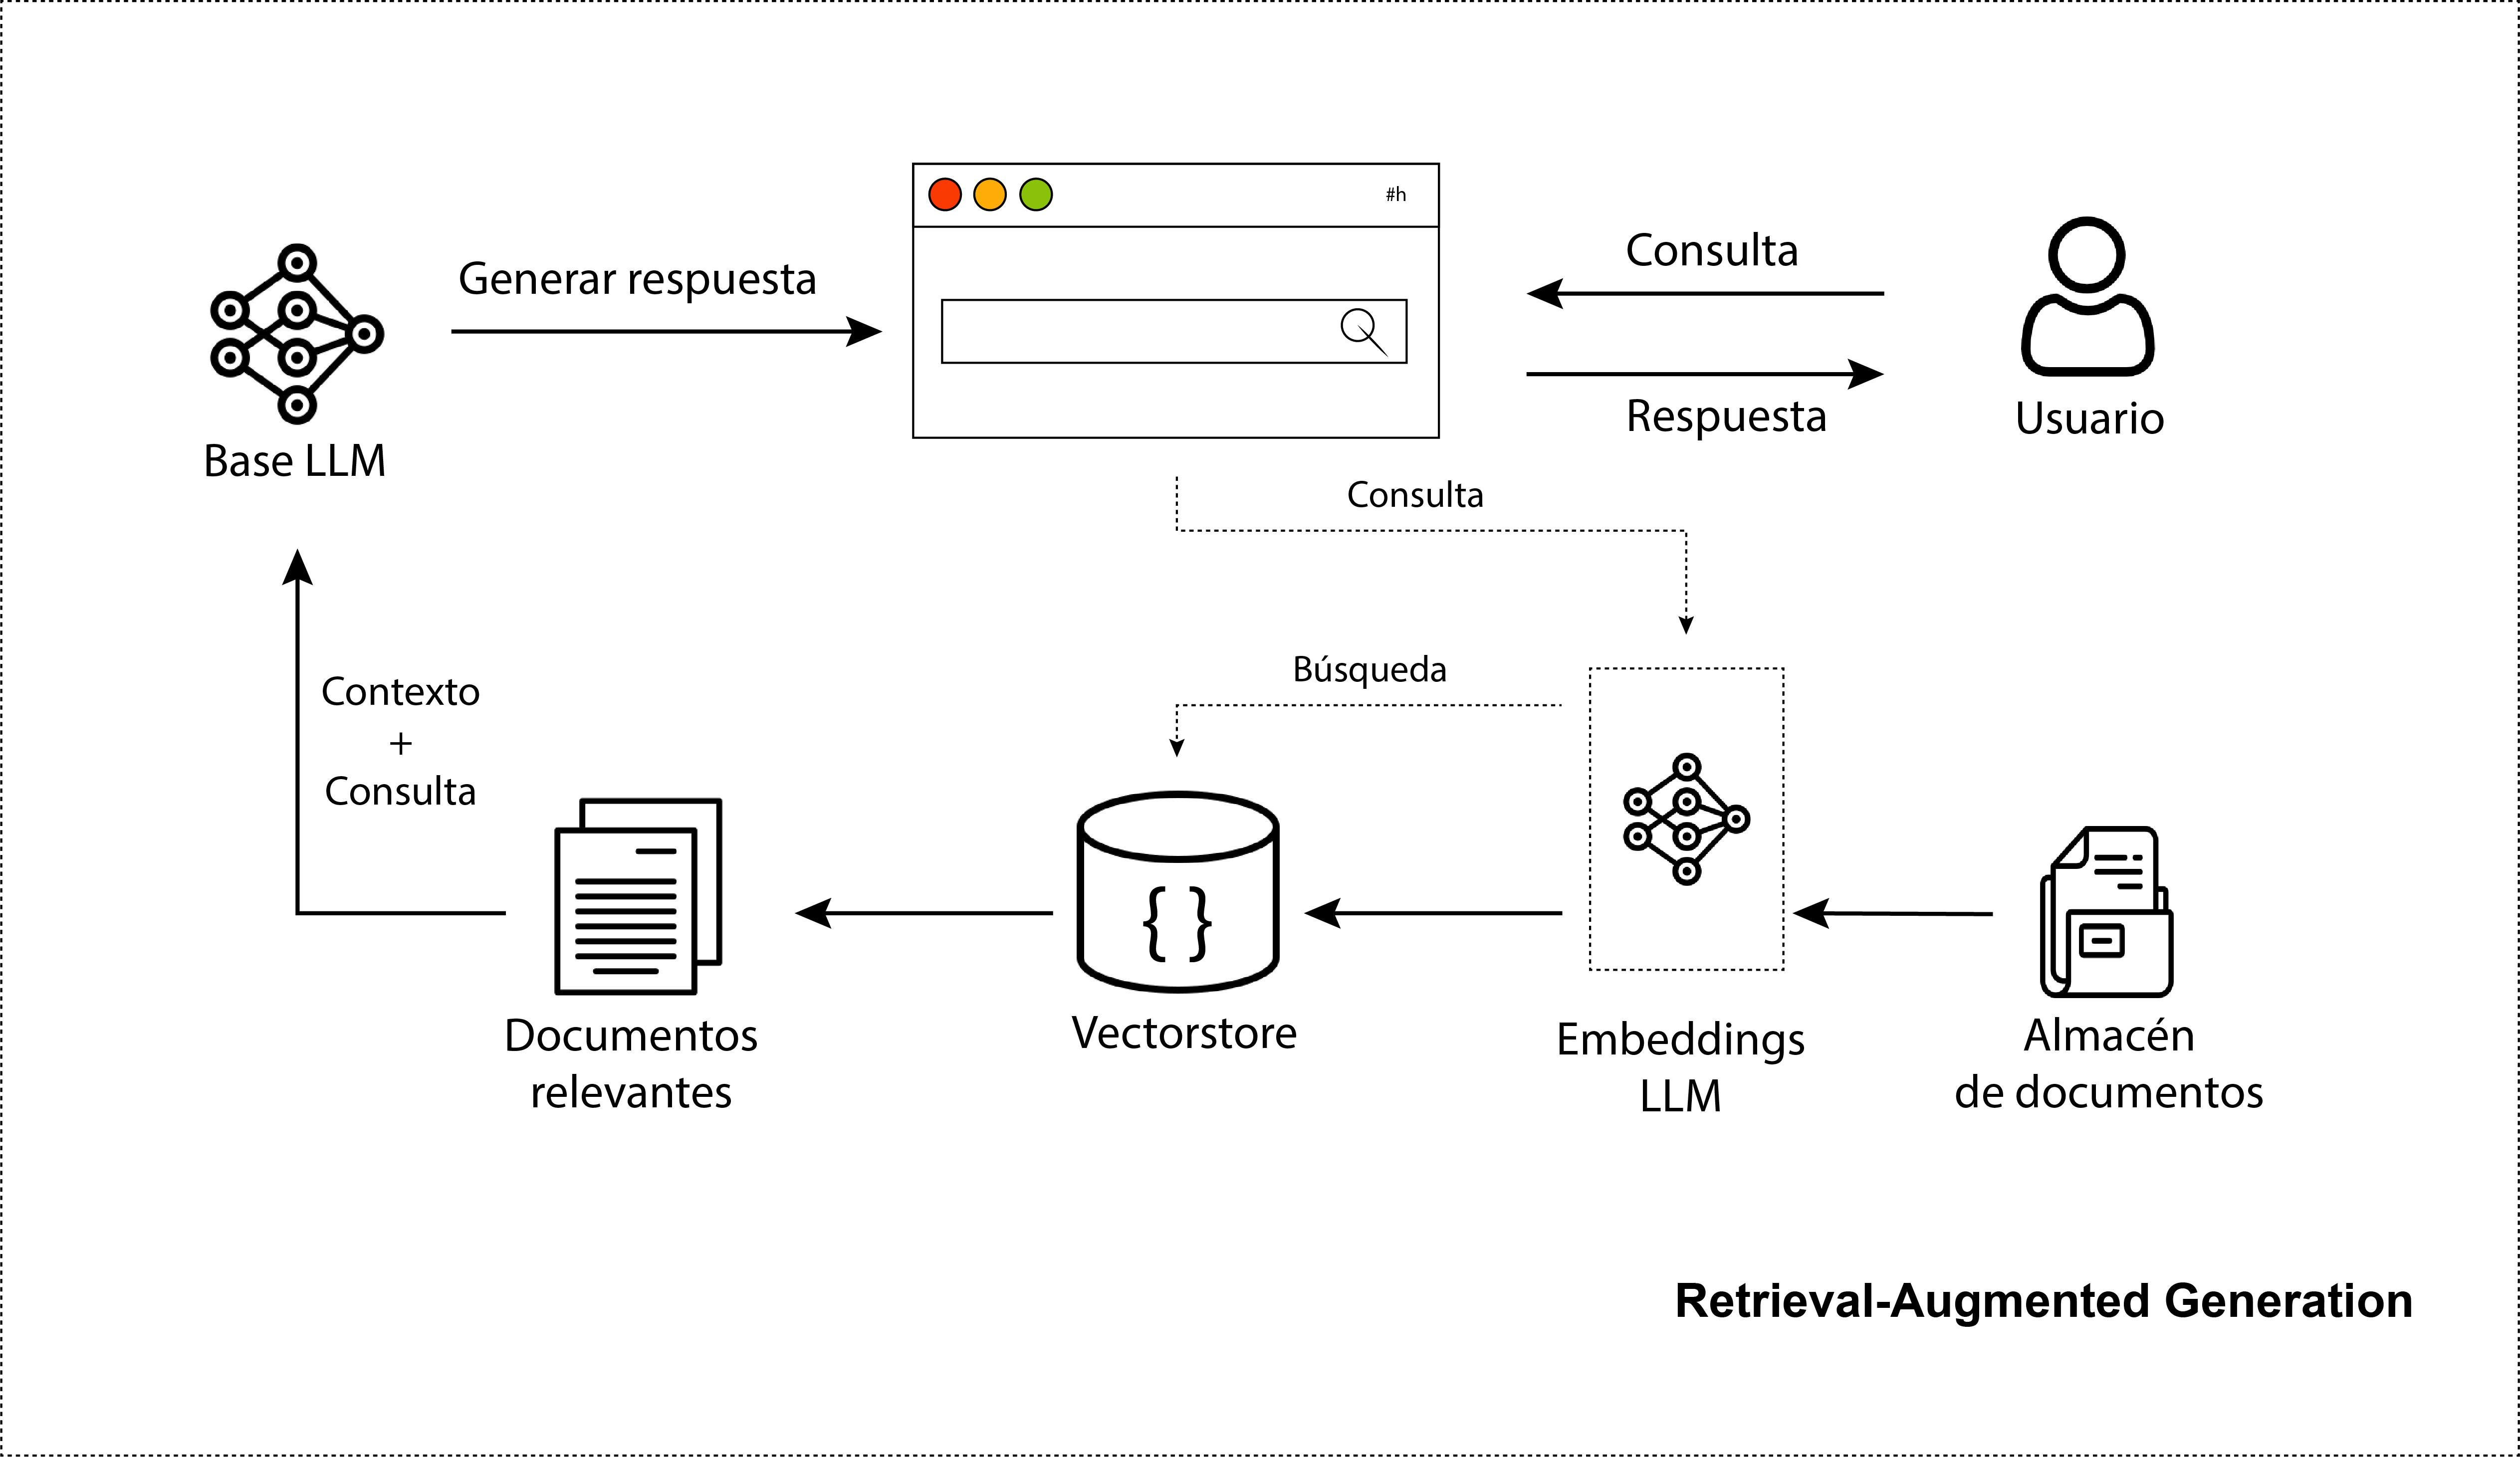

### **Instale las Librerías Necesarias**

Antes de conducir, hay que ponerse el cinturón de seguridad; del mismo modo aquí, antes de hacer nada, asegúrate de tener instalado el paquete **OpenAI** y también **LlamaIndex**, **LangChain** y **PyPDF**. Necesitas instalar **`PyPDF`** para habilitar las funciones integradas de **`LlamaIndex`** para **leer** y **convertir** archivos **`PDF`**.

In [ ]:

!pip install pypdf --quiet
!pip install gradio --quiet
!pip install langchain --quiet
!pip install llama_index --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.3/272.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s eta 

### **Importaciones**

En el siguiente fragmento de código, importamos el paquete **`openai`** junto con las **clases** y **funciones** incorporadas de los paquetes **`LlamaIndex`** y **`LangChain`**. Además, importamos el paquete **`os`** para definir algunas ***environment variables*** que configuraremos más adelante.

In [ ]:
import os
import gradio as gr

from langchain.embeddings import OpenAIEmbeddings
from langchain.chat_models import AzureChatOpenAI

from llama_index import (
    LLMPredictor,
    PromptHelper,
    StorageContext,
    ServiceContext,
    LangchainEmbedding,
    GPTVectorStoreIndex,
    SimpleDirectoryReader,
    load_index_from_storage,
    set_global_service_context)

from llama_index.node_parser import SimpleNodeParser
from llama_index.text_splitter import TokenTextSplitter
from llama_index.response.notebook_utils import display_response

Utilizaremos **Azure OpenAI Studio** para lo cual necesitamos acceder a la **API de OpenAI**. Empecemos por configurar los ***entornos de las variables*** para configurar el acceso a la API OpenAI alojada en Azure. Esto implica incluir la **clave API**, **versión**, **tipo** y **URL base** que son esenciales para que el script de Python se comunique efectivamente con la API.

Cabe destacar que la API OpenAI del sitio web puede integrarse de forma similar, requiriendo la configuración de una única variable de entorno, **`OPENAI_API_KEY`**.

In [ ]:
os.environ['OPENAI_API_KEY'] = 'your-openai-api-key'
os.environ['OPENAI_API_TYPE'] = 'your-openai-api-type'
os.environ['OPENAI_API_VERSION'] = 'your-openai-api-version'
os.environ['OPENAI_API_BASE'] = 'your-openai-api-base'

### **Service Context**

En la siguiente función, después de establecer varios **parámetros de restricción**, incluyendo `max_input_size` y `num_outputs`. Para tratar eficazmente con las **limitaciones de token de ventana de contexto** del LLM definimos un prompt helper, **`PromptHelper`**. Este ayudante calcula el tamaño de contexto disponible partiendo del tamaño de la ventana de contexto del LLM y reservando espacio para la plantilla de aviso y la salida.

El prompt helper proporciona una utilidad para `reempaquetar` trozos de texto (recuperados del índice) para aprovechar al máximo la ventana de contexto disponible (y reducir así el número de llamadas LLM necesarias), o truncarlos para que quepan en una sola llamada LLM. De hecho, siéntase libre de ajustar las opciones de configuración para alinearlas con sus necesidades.

Además, utilizamos la clase **`AzureChatOpenAI`** para crear nuestro modelo de chat basado en **GPT-3.5 Turbo**. En particular, **chatgpt_model** sirve como nombre de implementación para GPT-3.5 Turbo en Azure OpenAI Studio. Además, utilizamos la clase **`OpenAIEmbeddings`** para construir nuestro incrustador, aprovechando el potente modelo de incrustación de OpenAI **text-embedding-ada-002**.

Por último, construimos **`ServiceContext`**, que agrupa los recursos más utilizados durante las fases de indexación y consulta de un proceso LlamaIndex. Lo empleamos para configurar tanto la configuración **global** como la **local**.

In [ ]:
def create_service_context(
    # Parámetros de restricción
    max_input_size=4096,        # Context window para el LLM.
    num_outputs=256,            # Numero de output tokens para el LLM.
    chunk_overlap_ratio=0.1,    # Chunk overlap como el ratio of chunk size.
    chunk_size_limit=None,      # Maximo de chunk size a usar.
    chunk_overlap=20,           # Set chunk overlap a usar.
    chunk_size=1024):           # Set chunk size a usar.
    
    # El parser sintáctico que convierte los documentos en nodos.
    node_parser = SimpleNodeParser.from_defaults(
        # El text splitter utilizado para dividir el texto en trozos.
        text_splitter=TokenTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap))

    # Permite al usuario establecer explícitamente determinados parámetros de restricción.
    prompt_helper = PromptHelper(
        max_input_size,
        num_outputs,
        chunk_overlap_ratio,
        chunk_size_limit=chunk_size_limit)

    # LLMPredictor es una clase que envuelve LLMChain de LangChain que permite una fácil integración
    # en LlamaIndex.
    llm_predictor = LLMPredictor(
        llm=AzureChatOpenAI(
            # temperature=0.5,
            deployment_name="chatgpt_model",
            max_tokens=num_outputs))

    # El modelo de embeddings utilizado para generar representaciones vectoriales del texto.
    embedding_llm = LangchainEmbedding(
        langchain_embeddings=OpenAIEmbeddings(
            model="text-embedding-ada-002",
            chunk_size=1))

    # Construye el service_context
    service_context = ServiceContext.from_defaults(
        llm_predictor=llm_predictor,
        embed_model=embedding_llm,
        node_parser=node_parser,
        prompt_helper=prompt_helper)

    return service_context


### **Carga de Datos**

Como nos encanta conectar la investigación con la producción, utilizaremos el artículo [**Chinchilla**](https://arxiv.org/abs/2203.15556) de Jordan Hoffmann et al. de DeepMind como nuestros datos privados y haremos algunas preguntas interesantes sobre sus principales conclusiones. Al hablar del artículo sobre Chinchilla, nos viene a la mente el modelo de parámetros **Chinchilla-70B** entrenado como modelo óptimo de cálculo con **1,4 billones de fichas**. Las conclusiones del artículo sugieren que este tipo de modelos se entrenan de forma óptima **escalando de forma equitativa tanto el tamaño del modelo como los tokens de entrenamiento**. Utiliza el mismo presupuesto de cálculo que Gopher pero con **4 veces más datos de entrenamiento**.

In [ ]:

!mkdir data

### **Data Ingestion**

En la etapa de **ingestión de datos**, empezamos creando un directorio llamado **`data`** que contiene sólo un archivo **PDF**, el archivo PDF del papel Chinchilla, luego usamos el **`SimpleDirectoryReader`** para leerlo y luego convertirlo en un índice usando el **`GPTVectorStoreIndex`**.

De hecho, para indexar nuestros documentos incrustados, utilizamos LlamaIndex **`GPTVectorStoreIndex`**, que crea **vectores numéricos** a partir del texto utilizando **palabras incrustadas** y recupera los documentos relevantes basándose en la **similitud** de los vectores. Cuando indexamos los documentos.

**La recreación del índice es un proceso que consume mucho tiempo, pero puede evitarse guardando el contexto. El siguiente comando guarda el índice en el directorio por defecto **`./storage`**.

In [ ]:
def data_ingestion_indexing(directory_path):
  # Carga los datos de la ruta de directorio especificada
  documents = SimpleDirectoryReader(directory_path).load_data()

  # Al crear el índice por primera vez
  index = GPTVectorStoreIndex.from_documents(
      documents, service_context=create_service_context()
  )

  # Manten el índice en el disco, carpeta "storage" por defecto
  index.storage_context.persist()

  return index

### **Ejecutar una consulta**

**`Estableciendo la configuración global`**: Podemos establecer un **contexto de servicio** como el **por defecto global** que se aplica a toda la tubería de LlamaIndex.

In [ ]:

service_context = create_service_context()
set_global_service_context(service_context)

Nuestro enfoque consiste en formular una pregunta general sobre el documento y obtener una respuesta utilizando v**`query_engine.query`**. Además, formulamos una serie de preguntas de seguimiento relacionadas utilizando **`query_engine.chat`** sin proporcionar contexto adicional. En las próximas secciones nos explayaremos sobre estas dos opciones. Ahora vamos a iniciar nuestro **index**. Por favor, asegúrese de que ha movido el papel de chinchilla a la carpeta **`data`** antes de ejecutar el siguiente fragmento:

In [ ]:

index = data_ingestion_indexing("data")

#### **1. Q&A**

Una vez que nuestros datos privados han sido indexados, podemos empezar a hacer preguntas utilizando **`as_query_engine()`**. Esta función permite hacer preguntas sobre información específica dentro del documento y recibir la respuesta correspondiente con la ayuda del modelo **GPT-3.5 Turbo** de OpenAI.

In [ ]:

query_engine = index.as_query_engine()

In [ ]:

response = query_engine.query("Hello who are you?")
display_response(response)

**`Final Response:`** I am an expert Q&A system that is trusted around the world.

In [ ]:
response = query_engine.query("What is the chinchilla model?")
display_response(response)

**`Final Response:`** The Chinchilla model is an autoregressive transformer language model developed by DeepMind for research on language models, including research on the scaling behavior of language models. It has been evaluated on various tasks such as closed-book question answering, coreference resolution, and MMLU, and has been found to outperform Gopher in most cases. The model was last updated in March 2022.

> **¡Genial!** Como puede verse, el modelo LLM ha **respondido** con **precisión** a la **consulta**. Buscó en el índice y encontró la información relevante, luego la escribió de una manera similar a la humana. Un punto adicional a destacar es que hemos utilizado **`display_response()`** para mostrar la respuesta en un formato HTML bien estructurado.

> Otro aspecto desafortunado de ChatGPT es que, cuando le planteamos las mismas preguntas, parecía desconocer la actualidad mundial. A continuación encontrarás su divertida respuesta:

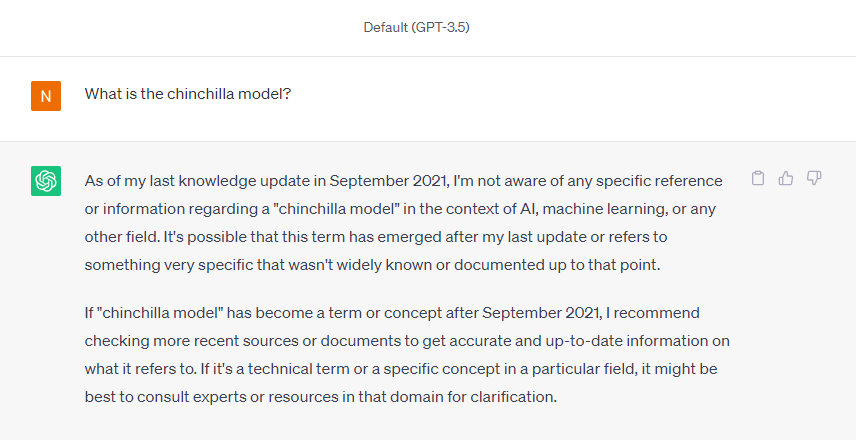

In [ ]:
response = query_engine.query("How many parameters does it have?")
display_response(response)

**`Final Response:`** The number of parameters is not specified in the given context information.

> El modelo sabe a qué palabra se refiere **it** y no fue capaz de responder. Sin embargo, esto ocurrirá con frecuencia en el contexto de las preguntas de seguimiento. Abordaremos esta cuestión en la próxima sección.

In [ ]:
response = query_engine.query("What are the key findings of the chinchilla study?")
display_response(response)

**`Final Response:`** Chinchilla outperforms Gopher and GPT-3 on various benchmarks including Natural Questions and TriviaQA. It also shows improvements in resolving pronouns more accurately and generating less toxic language. Additionally, Chinchilla outperforms Gopher and GPT-3 on reading comprehension tasks and common sense benchmarks. The study also highlights potential issues related to gender bias and toxic language generation in large language models.

Incluso puede comprobar el **archivo de referencia y la página** de la respuesta como se muestra aquí:

In [ ]:
reference_file_name = response.source_nodes[0].node.metadata["file_name"]
reference_page = response.source_nodes[0].node.metadata["page_label"]

print("The reference file is", reference_file_name, "page number", reference_page)

The reference file is chinchilla.pdf page number 14


#### **2. Chatbot**

En lugar de Q&A, también podemos utilizar LlamaIndex para crear un **Chatbot** personal que soporte **`follow up`** de preguntas **sin dar contexto adicional**. Sólo tenemos que inicializar el índice con la función **as_chat_engine()**.

In [ ]:

chat_engine = index.as_chat_engine()

In [ ]:
response = chat_engine.chat("What is the chinchilla model?")
display_response(response)

**`Final Response:`** I have already answered your question about the chinchilla model. It is an autoregressive transformer language model developed by DeepMind for research on language models. It has been evaluated on tasks such as closed-book question answering and coreference resolution, and has shown better performance than other models such as Gopher and GPT-3. The model was last updated in March 2022.

In [ ]:
response = chat_engine.chat("How many parameters does it have?")
display_response(response)

**`Final Response:`** The chinchilla model has 70 billion parameters.

### **Bonus**

Como fan de 🤗 [Hugging Face](https://huggingface.co/) y su ecosistema, no puedo concluir este blog sin hablar de él de alguna manera. De hecho, nuestro bono consiste en crear una interfaz sencilla utilizando [Gradio](https://www.gradio.app/) de 🤗 para chatear con nuestro sistema. Para ello, implementamos una función que reconstruye el contexto de almacenamiento, carga el índice y lo consulta con un texto de entrada.

In [ ]:
def data_querying(input_text, follow_up_questions = True):
  # Reconstruir el storage context
  storage_context = StorageContext.from_defaults(persist_dir="./storage")

  # Carga el índice desde el almacenamiento
  index = load_index_from_storage(storage_context, service_context=create_service_context())

  # Comprueba si es un chat de seguimiento o no
  # A continuación, consulta el índice con el texto de entrada
  if follow_up_questions:
    response = index.as_chat_engine().chat(input_text)
  else:
    response = index.as_query_engine().query(input_text)
  return response.response

In [ ]:
iface = gr.Interface(
    fn=data_querying,
    inputs=gr.components.Textbox(lines=3, label="Enter your question"),
    outputs="text",
    title="Ask Me Anything About Chinchilla Paper")

iface.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
iface = gr.ChatInterface(
    data_querying,
    title="ChinchillaBOT")

iface.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

> #### ¡Qué guay! 🤗

---

> El código completo está disponible en este [repositorio](https://github.com/zekaouinoureddine/Adding-Private-Data-to-LLMs) de **GitHub**.

### **Conclusión**

Nuestra aventura ha llegado a su fin, pero aquí van algunas conclusiones: En este tutorial, hemos visto que **`LangChain`** y **`LlamaIndex`** proporcionan potentes conjuntos de herramientas para construir aplicaciones inteligentes basadas en la **RAG** que combinan las fortalezas de los grandes modelos lingüísticos con bases de conocimiento personalizadas. Permiten crear un almacén indexado de datos específicos del dominio y aprovecharlo durante la inferencia para proporcionar un contexto relevante al LLM con el fin de generar respuestas de alta calidad en un lenguaje similar al humano. Sin embargo, estamos seguros de que sólo hemos cubierto algunos aspectos básicos, pero veremos más cosas interesantes sobre RAG en el futuro. ¡Estad atentos!

---